# 0. Set Up & Uploading csv files

In [1]:
# data manipulation
import pandas as pd

# Utility
from sklearn.model_selection import train_test_split
from gensim.corpora.dictionary import Dictionary
import sys
from nltk.corpus import stopwords
import math
import numpy as np



# Models
from gensim.models.ldamodel import LdaModel

# Visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.concat(map(pd.read_csv, ['articles1.csv', 'articles2.csv','articles3.csv']))
df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


# Question 1 (Describe a publication)

### (a)

In [3]:
breitbart = df.loc[df['publication'] == 'Breitbart']
print(breitbart)

       Unnamed: 0     id                                              title  \
7803         7803  26539  CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...   
7804         7804  26540  American Students on Spring Break Chant ’Build...   
7805         7805  26541  Surge in ’Honour Crimes’ and Forced Marriages ...   
7806         7806  26542       MILO Announces New Media Venture - Breitbart   
7807         7807  26543  Jared Kushner at Center of Media Spotlight on ...   
...           ...    ...                                                ...   
31579       31587  50353  Tim Kaine Calls State Borders ’Just a Dotted L...   
31580       31588  50354  Carly Fiorina: Bashes Establishment for Expres...   
31581       31589  50355  Florida Senate Candidate Drops Out, Opening Sp...   
31582       31590  50356         Constitution Allows Muslim Immigration Ban   
31583       31591  50357  Turkey Will ’Open Gates’ to Migrants if EU Mem...   

      publication               author        date 

In [4]:
bre_art = breitbart['content']
bre_art

7803     On Tuesday’s broadcast of CNN’s “Situation Roo...
7804     A group of American spring break revelers repo...
7805       “honour crimes” have risen by 40 per cent in...
7806     Former Breitbart Senior Editor MILO has announ...
7807     The focus of the continuous media reports of a...
                               ...                        
31579    Democratic vice presidential candidate Tim Kai...
31580    2016 GOP presidential candidate and former Hew...
31581    Florida Republican Representative David Jolly ...
31582    While Hillary Clinton and her Democrats are tr...
31583    The day after the European Union (EU) Parliame...
Name: content, Length: 23781, dtype: object

### (b)

In [5]:
!pip install nltk

import nltk 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')
def show_vocabulary(vectorizer, word_size=15, words_per_line=10):
    words = vectorizer.get_feature_names()

    print(f'Vocabulary size: {len(words)} words')

    word_format = f'<{word_size}'
    for l in np.array_split(words, math.ceil(len(words) / words_per_line)):
        print(''.join([f'{x:{word_format}}' for x in l]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minsungkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
vectorizer = CountVectorizer(stop_words=stops,                  # remove english stopwords
                             token_pattern=r'\b[a-zA-Z]{3,}\b', # word made entirely of letters, at least 3 letters
                             lowercase=True)                    # transform all texts to lower case
vectorizer.fit(bre_art)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\b[a-zA-Z]{3,}\\b')

In [8]:
print(len(vectorizer.vocabulary_))
#95665 vocabulary

95665


In [9]:
show_vocabulary(vectorizer)

Vocabulary size: 95665 words
aaa            aaany          aaarena        aabb           aabenraa       aabo           aabramson      aacc           aachen         aadahhaj       
aadara         aaefg          aafia          aafsec         aag            aahronheim     aai            aaidh          aaima          aaironfist     
aajc           aal            aalborg        aam            aamaq          aameeen        aamer          aameranwar     aaminah        aan            
aanslag        aanval         aap            aapbenefit     aapi           aapl           aapolicyforum  aaps           aaqil          aarash         
aaren          aargau         aargauer       aarhus         aaron          aaronblake     aaroncarter    aarongreenberg aaronhoff      aaronkatersky  
aaronkleinshow aaronmesh      aaronovitch    aarosenberg    aarp           aart           aartipole      aaryn          aas            aashiq         
aasia          aasif          aat            aaup           aauw 

### (c)

In [10]:
def top_n_gram(n_gram_from, n_gram_to, article):
    countv = CountVectorizer(ngram_range=(n_gram_from, n_gram_to),
                             stop_words=stops,
                             token_pattern=r'\b[a-zA-Z]{3,}\b', 
                             lowercase=True).fit(article)
    bag_of_words = countv.transform(article)
    words_sum = bag_of_words.sum(axis = 0)
    words_frequency = [(word, words_sum[0, i]) for word, i in countv.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse = True)
    return words_frequency[:10]

In [11]:
top_n_gram(1,1,bre_art)

[('trump', 66233),
 ('said', 51074),
 ('people', 31149),
 ('clinton', 30408),
 ('president', 26352),
 ('would', 25685),
 ('one', 25625),
 ('news', 23231),
 ('twitter', 22539),
 ('new', 21691)]

In [12]:
top_n_gram(2,2,bre_art)

[('donald trump', 16444),
 ('breitbart news', 10149),
 ('hillary clinton', 9764),
 ('united states', 7866),
 ('pic twitter', 6779),
 ('new york', 6587),
 ('white house', 4987),
 ('breitbart texas', 3518),
 ('follow twitter', 3515),
 ('fox news', 2823)]

# Question 2 (TF-IDF)

### (a)

In [13]:
atlantic = df.loc[df['publication'] == 'Atlantic']
print(atlantic)

       Unnamed: 0     id                                              title  \
49829       53120  73206  Obama: Reaching Out to Adversaries, Alienating...   
49830       53121  73207  George Michael and Carrie Fisher: The Week in ...   
49831       53122  73208                                 The New Reality TV   
49832       53123  73209           5 Numbers That Explain Education in 2016   
49833       53124  73210  The Atlantic  Politics & Policy Daily: Happy G...   
...           ...    ...                                                ...   
7003        60321  82575  The Three-Word Question That’s Changing What C...   
7004        60322  82576   The Year in Race, Identity, and Criminal Justice   
7005        60323  82577             A Cartoon Gateway to Real-World Issues   
7006        60324  82578                 Democrats Have a Religion Problem    
7007        60325  82579                  The Buried Story of Male Hysteria   

      publication           author        date    y

In [14]:
atl_art = atlantic['content']
atl_art

49829    As a presidential candidate, Barack Obama prom...
49830    George Michael Mattered Beyond the MusicWesley...
49831    “Reality seems tired. It seems derivative,” a ...
49832    As a writer, I generally favor words over numb...
49833            This article is part of a feature we a...
                               ...                        
7003     If there is no doubting the good that humanita...
7004     Every December, The Atlantic looks back on the...
7005     This is the fourth installment in our series e...
7006     There aren’t many people like Michael Wear in ...
7007     When a raving    man was committed to Hudson R...
Name: content, Length: 7179, dtype: object

### (b)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize       
import re
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/minsungkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/minsungkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
class WNLemmatizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_only_letters =  r"[^a-zA-Z]"   #only letters
        regex_short_words = r'(\b\w{1}\b)'      #at least 2 letters
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_only_letters, t) and not re.search(regex_short_words, t)]
    
vec = TfidfVectorizer(
    stop_words=stops, # remove stop words
    lowercase=True,# only lowercase
    tokenizer=WNLemmatizer())


vec = vec.fit(atl_art)


show_vocabulary(vec)
#Vocabulary size: 74368 words

/Users/minsungkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/minsungkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Vocabulary size: 74368 words
aa             aaa            aaaaaaaaaaaaah aaaaaaaaaaaand aaaaaaahhhhhhhhhhaaaaalmost     aaaahhhh       aaaalmost      aaai           aac            
aaccess        aaf            aafa           aage           aahed          aaibwth        aalegra        aaliyah        aamc           aamer          
aamodt         aanp           aap            aardvark       aargau         aarhus         aaron          aaronson       aarp           aarrs          
aarslev        aasa           aasen          aashish        aasif          aaup           aave           ab             aba            abaaoud        
ababa          aback          abacus         abadi          abalone        abandon        abandoned      abandoning     abandonment    abashedness    
abate          abated         abatement      abates         abating        abawds         abazid         abba           abballa        abbas          
abbasi         abbasid        abbate         abbe           abb

### (c)

Inverse Document Frequency (IDF) indicates how commonly a word is used. The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus. The less frequent its usage across documents, the higher its score. We here expect to find 10 bigram and unigrams of typos, meaningless words, identifiers in this question.

In [17]:
#For Unigram

X = vec.fit_transform(atl_art)
feature_array = vec.get_feature_names()

top_n = 10

print('Top 10 IDF values: \n', sorted(list(zip(feature_array,vec.idf_,)),
       key = lambda x: x[1], reverse=True)[:top_n])

Top 10 IDF values: 
 [('aaaaaaaaaaaaah', 9.185907481482324), ('aaaaaaaaaaaand', 9.185907481482324), ('aaaaaaahhhhhhhhhh', 9.185907481482324), ('aaaahhhh', 9.185907481482324), ('aaaalmost', 9.185907481482324), ('aaai', 9.185907481482324), ('aac', 9.185907481482324), ('aaccess', 9.185907481482324), ('aaf', 9.185907481482324), ('aafa', 9.185907481482324)]


In [18]:
## For Bigram

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_punctuation =  r"[^a-zA-Z]"   #only letters
        regex_little_words = r'(\b\w{1}\b)'     #at least 2 letters
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_punctuation, t) and not re.search(regex_little_words, t)]
    
vec2 = TfidfVectorizer(
    stop_words=stops, # remove stop words
    lowercase=True, # only lowercase
    tokenizer=LemmaTokenizer(),
    ngram_range = (2,2)) # for bigrams

vec2 = vec2.fit(atl_art)


X = vec2.fit_transform(atl_art)
feature_array = vec2.get_feature_names()

top_n = 10

print('Top 10 IDF values: \n', sorted(list(zip(feature_array,vec2.idf_,)),
       key = lambda x: x[1], reverse=True)[:top_n])

Top 10 IDF values: 
 [('aa explosion', 9.185907481482324), ('aa na', 9.185907481482324), ('aa would', 9.185907481482324), ('aaa credit', 9.185907481482324), ('aaa director', 9.185907481482324), ('aaa foundation', 9.185907481482324), ('aaa land', 9.185907481482324), ('aaa released', 9.185907481482324), ('aaa society', 9.185907481482324), ('aaaaaaaaaaaaah simply', 9.185907481482324)]


As we expected, we found bunch of meaningless words and typos. (+) Just to observe uncommon words aside of typos, we tried to filter by document frequency. When we restrict our dictionary by parameter, min_df = 3, (words that appear in more than 3 documents will be in the vocabulary) we can observe identifers, such as names. (See codes below)

In [19]:
#Bigram case _ min_df=3 version ; to observe uncommon words aside of typos.

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_punctuation =  r"[^a-zA-Z]"   #only letters
        regex_little_words = r'(\b\w{1}\b)'     #at least 2 letters
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_punctuation, t) and not re.search(regex_little_words, t)]
    
vec3 = TfidfVectorizer(
    stop_words=stops,
    lowercase=True,
    tokenizer=LemmaTokenizer(),
    ngram_range = (2,2),min_df =3)

vec3 = vec3.fit(atl_art)


X = vec3.fit_transform(atl_art)
feature_array = vec3.get_feature_names()

top_n = 10

print('Top 10 IDF values: \n', sorted(list(zip(feature_array,vec3.idf_,)),
       key = lambda x: x[1], reverse=True)[:top_n])

Top 10 IDF values: 
 [('aa meeting', 8.492760300922379), ('aaron big', 8.492760300922379), ('aaron first', 8.492760300922379), ('aaron klein', 8.492760300922379), ('aaron kristin', 8.492760300922379), ('aaron paul', 8.492760300922379), ('aba submission', 8.492760300922379), ('abandon career', 8.492760300922379), ('abandon clinton', 8.492760300922379), ('abandon effort', 8.492760300922379)]


# Question 3 (Topic Modeling)

### (a)

In [20]:
import warnings
import spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 5.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
nyt = df.loc[df['publication'] == 'New York Times']

In [22]:
nyt_art = nyt['content']

We used LDA with sklearn. We added 'like', 'said', 'know', 'think','mr','ms' into stopwords on top of english stopwords, because these words appear a lot, and are uninformative.

In [24]:
from sklearn.decomposition import LatentDirichletAllocation


add_stops = stopwords.words('english') + ['like', 'said', 'know', 'think','mr','ms']

count = CountVectorizer(
    stop_words=add_stops, # remove stopwords
    ngram_range=(1,1), # for unigrams
    lowercase = True, # considering only lowercase
    min_df=5,# filter terms by doc frequency - has to be in 
    max_df=0.85, # filter terms by doc frequency
    token_pattern=r'[a-z]+')

bow = count.fit_transform(nyt_art)

K = 20

ldask = LatentDirichletAllocation(
    n_components=K,
    max_iter=100, 
    random_state=0)

ldask.fit(bow)

LatentDirichletAllocation(max_iter=100, n_components=20, random_state=0)

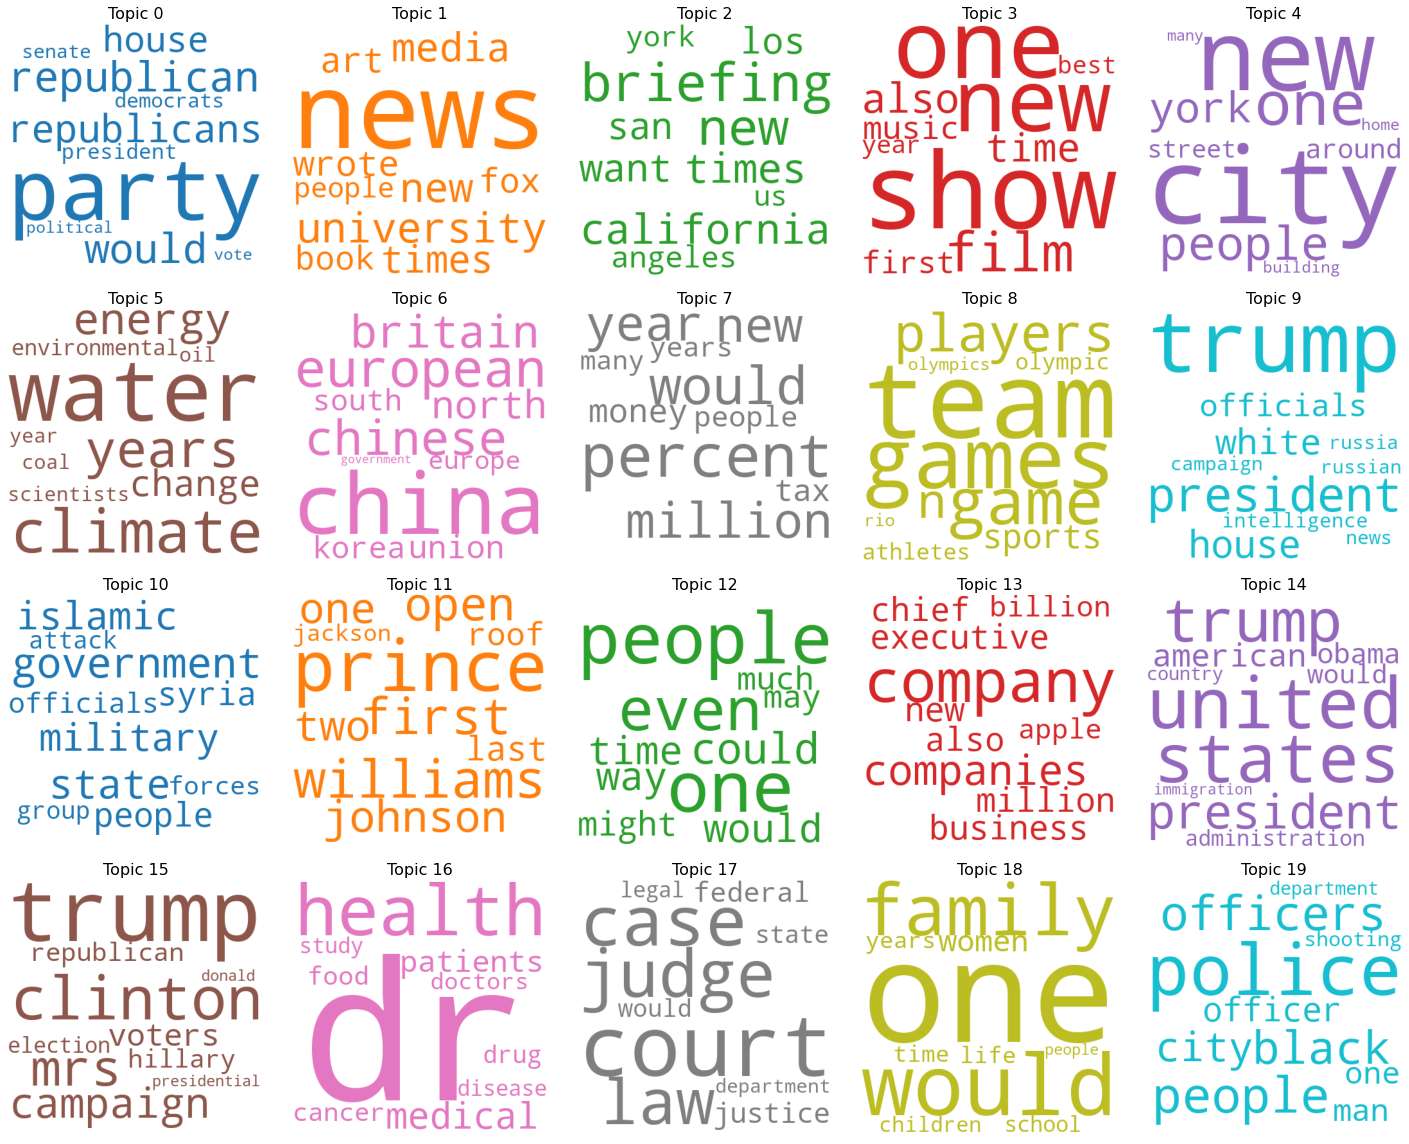

In [26]:
#WordClouds : We will display on the TOP 10 most important words

import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

nb_columns = 5
nb_rows = math.ceil(K / nb_columns)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols * math.ceil(K / len(cols))

cloud = WordCloud(background_color='white',
                  width=400,
                  height=400,
                  max_words=10,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldask.components_
feature_names = count.get_feature_names()
n_top_words = 10

fig, axes = plt.subplots(ncols=nb_columns, nrows=nb_rows, 
                         figsize=(4*nb_columns, 4*nb_rows), 
                         sharex=True, sharey=True)

for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    # This is different than with GENSIM
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    topic_words = {feature_names[i]: topic[i] for i in top_features_ind}
    # End Difference

    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    ax.set_title(f'Topic {i}', fontdict=dict(size=16))
    ax.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

According to the word clouds, some of the topics are not clear what they are representing. For example, topic 12, with given top 10 words, we cannot exactly label what the exact topic is. Therefore, further research is required to find an optimal K (number of topics) by using methods such as grid search (evaluation metric coherence).

# Question 4

### (a) Getting a Corpus Articles published by NY Times or Breitbart

In [28]:
# Select articles published by NY Times or Breitbart

# Put breitbart here
df_ny = df[df['publication'].isin(['New York Times'])].reset_index(drop=True).head(50)
df_breit = df[df['publication'].isin(['Breitbart'])].reset_index(drop=True).head(50) 

df = pd.concat([df_ny, df_breit])

texts = df['content']

In [29]:
#These are all of the contents of New York Times and Breitbart
texts

0     WASHINGTON  —   Congressional Republicans have...
1     After the bullet shells get counted, the blood...
2     When Walt Disney’s “Bambi” opened in 1942, cri...
3     Death may be the great equalizer, but it isn’t...
4     SEOUL, South Korea  —   North Korea’s leader, ...
                            ...                        
45    The Dijon prosecutor has launched an investiga...
46      Miss USA Kara McCullough is walking back an ...
47    On Tuesday, China slammed the United States’ d...
48    Marvel Comics was forced to issue an apology f...
49    President Donald Trump has appointed the   adv...
Name: content, Length: 100, dtype: object

### (c) Train/Test Splitting

In [30]:
# X should be content of NewYorkTimes and Breitbart.
X = texts    #texts = df['content']
X

0     WASHINGTON  —   Congressional Republicans have...
1     After the bullet shells get counted, the blood...
2     When Walt Disney’s “Bambi” opened in 1942, cri...
3     Death may be the great equalizer, but it isn’t...
4     SEOUL, South Korea  —   North Korea’s leader, ...
                            ...                        
45    The Dijon prosecutor has launched an investiga...
46      Miss USA Kara McCullough is walking back an ...
47    On Tuesday, China slammed the United States’ d...
48    Marvel Comics was forced to issue an apology f...
49    President Donald Trump has appointed the   adv...
Name: content, Length: 100, dtype: object

In [51]:
# y should be labels (whether NewYorkTimes or Brietbart)

y = df['publication']
y

0     New York Times
1     New York Times
2     New York Times
3     New York Times
4     New York Times
           ...      
45         Breitbart
46         Breitbart
47         Breitbart
48         Breitbart
49         Breitbart
Name: publication, Length: 100, dtype: object

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

### (d) 

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
add_stops = stopwords.words('english') + ['like', 'said', 'know', 'think', 'mr' ,'ms']

count = CountVectorizer(
    stop_words=add_stops, # remove stops
    ngram_range=(1,1), # unigrams
    lowercase = True,
    min_df=5,
    max_df=0.85,
    token_pattern=r'[a-z]+')

We added token_pattern as English letter (r'[a-z]+') to observe words from our models instead of punctuation or spaces.

### (e) LDA model with 20 topics

In [98]:
from sklearn.decomposition import LatentDirichletAllocation

K=20

ldask = LatentDirichletAllocation(
    n_components=K,
    max_iter=100, 
    random_state=0)

### (f) Logistic Regression with LDA

In [99]:
# Vectorize using count vectorizer X_train, X_test
X_train_c = count.fit_transform(X_train)
X_test_c = count.fit_transform(X_test)

In [100]:
# Transform vectorized X_train, X_test into lda model
X_train_lda = ldask.fit_transform(X_train_c)
X_test_lda = ldask.fit_transform(X_test_c)

In [101]:
# Instantiate a LogisticRegression

from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(max_iter=10000)

# fit it to your TRAIN data
clf.fit(X_train_lda,y_train)


LogisticRegression(max_iter=10000)

In [102]:
# Evaluate on the TEST data

from sklearn.metrics import classification_report

# Use classification_report

print(classification_report(y_true=y_test, y_pred=clf.predict(X_test_lda)))

                precision    recall  f1-score   support

     Breitbart       0.46      0.50      0.48        12
New York Times       0.14      0.12      0.13         8

      accuracy                           0.35        20
     macro avg       0.30      0.31      0.31        20
  weighted avg       0.33      0.35      0.34        20



### RandomForest with LDA

In [103]:
# Instantiate a RandomForest
from sklearn.ensemble import RandomForestClassifier

forest_lda = RandomForestClassifier(n_estimators=5, random_state=4)

# Fit it to TRAIN data 

forest_lda.fit(X_train_lda, y_train)

RandomForestClassifier(n_estimators=5, random_state=4)

In [104]:
# Evaluation

print(classification_report(y_true=y_test, y_pred= forest_lda.predict(X_test_lda)))

                precision    recall  f1-score   support

     Breitbart       0.69      0.92      0.79        12
New York Times       0.75      0.38      0.50         8

      accuracy                           0.70        20
     macro avg       0.72      0.65      0.64        20
  weighted avg       0.71      0.70      0.67        20



### (g) TF-IDF

In [105]:
# Building TF IDF vectors

from sklearn.feature_extraction.text import TfidfVectorizer
add_stops = stopwords.words('english') + ['like', 'said', 'know', 'think', 'mr' ,'ms']

tf = TfidfVectorizer(ngram_range=(1,1), 
                     stop_words=add_stops, # remove stopwords
                     lowercase=True,# lowercase
                     min_df=5, # filter documents
                     max_df=0.85) # filter documents

In [106]:
# Vectorize contents of Brietbart and Newyorktimes (train and test) using TFIDF
X_train_t = tf.fit_transform(X_train)
X_test_t = tf.transform(X_test)

### Logistic Regression with TF-IDF

In [107]:
# Instantiate a LogisticRegression
lg= LogisticRegression(max_iter=10000)

# fit it to your TRAIN data
lg.fit(X_train_t,y_train)

LogisticRegression(max_iter=10000)

In [108]:
#Evaluation

print(classification_report(y_true=y_test, y_pred=lg.predict(X_test_t)))

                precision    recall  f1-score   support

     Breitbart       0.90      0.75      0.82        12
New York Times       0.70      0.88      0.78         8

      accuracy                           0.80        20
     macro avg       0.80      0.81      0.80        20
  weighted avg       0.82      0.80      0.80        20



### Random Forest Classifier with TF-IDF

In [111]:
from sklearn.ensemble import RandomForestClassifier

forest_idf = RandomForestClassifier(n_estimators=5)
forest_idf.fit(X_train_t, y_train)

RandomForestClassifier(n_estimators=5)

In [112]:
# Evaluation

print(classification_report(y_true=y_test, y_pred=forest_idf.predict(X_test_t)))

                precision    recall  f1-score   support

     Breitbart       0.83      0.83      0.83        12
New York Times       0.75      0.75      0.75         8

      accuracy                           0.80        20
     macro avg       0.79      0.79      0.79        20
  weighted avg       0.80      0.80      0.80        20



### (h)

Overall, classification using TF-IDF demonstrated better performance in both the Random Forest and the Logistic Regression than when using the LDA model - for TF-IDF, both models had an accuracy of 0.80, compared to 0.70 and 0.35 for the LDA Forest and the LDA Logistic Regression, respectively. Within the TF-IDF models, an examination of the F1 scores tells us that whilst both models were better at classifying Breitbart articles, the Logistic Regression classifier was relatively better at classifing New York Times articles compared to Random Forest - indicated by a difference in F1 Score of 0.04 as opposed to 0.08 for the Forest.

Regarding the superiority of TF-IDF compared to LDA, this is perhaps because the LDA is an unsupervised model that is not normally used for classification. Indeed, it is a generative model and these often fare less well at classification tasks. 

The aforementioned accuracy scores highlight the second major point of note: when using LDA vectors, Random Forest shows much better performance than Logistic Regression, with double the accuracy score. That we see this difference with LDA and not TF-IDF suggests there is something specific to the LDA vector input which is much better suited to a Random Forest classifier.  

For further research to obtain better performance overall, we can conduct GridSearch for optimal hyperparameters, or do better data preprocessing.